## Observations and Insights 

Markdown
LaTeX: 𝛼2

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice
mouse_count = len(combined_data['Mouse ID'].unique())
mouse_count

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
dup_timepoint = combined_data.loc[combined_data.duplicated(subset = \
                             ['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_timepoint

array(['g989'], dtype=object)

In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
dup_timepoint_data = combined_data.set_index("Mouse ID")
dup_timepoint_df = dup_timepoint_data.loc["g989", :]
dup_timepoint_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
cleaned_data_df = combined_data[combined_data['Mouse ID'].isin(dup_timepoint) == False]
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(cleaned_data_df['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
drug_mean = cleaned_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].round(3)
drug_median = cleaned_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].round(3)
drug_variance = cleaned_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].round(3)
drug_std = cleaned_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].round(3)
drug_sem = cleaned_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].round(3)

# Use groupby and summary statistical methods to calculate the following properties of each drug 
# regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df = pd.DataFrame({"Mean": drug_mean,
                         "Median": drug_median,
                         "Variance": drug_variance,
                         "Std Dev": drug_std,
                         "SEM": drug_sem})
stats_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen
    
# Using the aggregation method, produce the same summary statistics in a single line
stat_df2 = cleaned_data_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": \
                                            ['mean', 'median', 'var', 'std', 'sem']}).round(3)
stat_df2

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

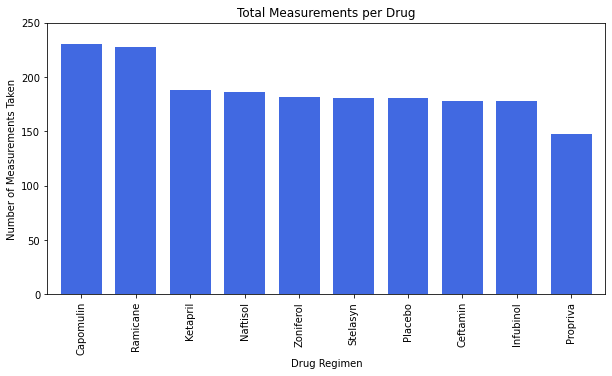

In [12]:
# Generate a bar plot showing the total # of measurements taken on each drug regimen using pandas.
regimen_data = cleaned_data_df["Drug Regimen"].value_counts()
# regimen_data
regimen_bar_chart = regimen_data.plot.bar(figsize=(10,5), color="royalblue", width=0.75)
regimen_bar_chart.set_title("Total Measurements per Drug")
regimen_bar_chart.set_xlabel("Drug Regimen")
regimen_bar_chart.set_ylabel("Number of Measurements Taken")
plt.ylim(0,250)
plt.show()

In [15]:
# Generate a bar plot showing the total # of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(regimen_data))
plt.bar(x_axis, regimen_data)
# plt.title("Total Measurements per Drug")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Measurements Taken")

plt.show()

NameError: name 'np' is not defined

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
